# 資料預處理

In [0]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [0]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [0]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [0]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [56]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('../dataset/lena.png') # 画像の読み込み
plt.imshow(img)

plt.show()

FileNotFoundError: ignored

In [62]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


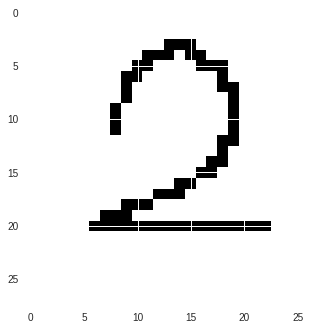

ValueError: ignored

In [83]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/Colab Notebooks/2 (1).png') # 画像の読み込み
plt.imshow(img)

plt.show()
x_test_image[1] = img

In [86]:
x_test_image[1][[0,0]]


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

In [87]:
img[0,0]

array([1., 1., 1.], dtype=float32)

# 建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [0]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [40]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.4381 - acc: 0.8830 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 2/20
 - 2s - loss: 0.1910 - acc: 0.9457 - val_loss: 0.1556 - val_acc: 0.9559
Epoch 3/20
 - 2s - loss: 0.1355 - acc: 0.9617 - val_loss: 0.1258 - val_acc: 0.9649
Epoch 4/20
 - 2s - loss: 0.1026 - acc: 0.9702 - val_loss: 0.1122 - val_acc: 0.9681
Epoch 5/20
 - 2s - loss: 0.0811 - acc: 0.9774 - val_loss: 0.0983 - val_acc: 0.9713
Epoch 6/20
 - 2s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0935 - val_acc: 0.9722
Epoch 7/20
 - 2s - loss: 0.0543 - acc: 0.9850 - val_loss: 0.0912 - val_acc: 0.9735
Epoch 8/20
 - 2s - loss: 0.0459 - acc: 0.9875 - val_loss: 0.0832 - val_acc: 0.9762
Epoch 9/20
 - 2s - loss: 0.0380 - acc: 0.9904 - val_loss: 0.0825 - val_acc: 0.9758
Epoch 10/20
 - 2s - loss: 0.0316 - acc: 0.9919 - val_loss: 0.0808 - val_acc: 0.9760
Epoch 11/20
 - 2s - loss: 0.0262 - acc: 0.9939 - val_loss: 0.0793 - val_acc: 0.9758
Epoch 12/20
 - 3s - loss: 0.0217 - 

# 以圖形顯示訓練過程

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

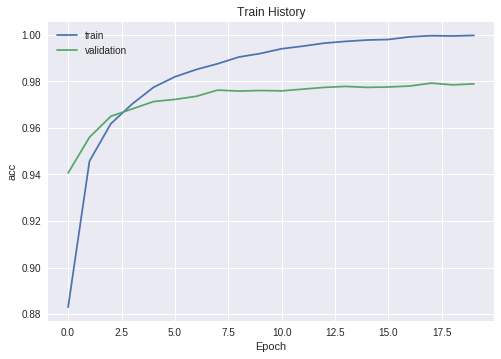

In [42]:
show_train_history(train_history,'acc','val_acc')

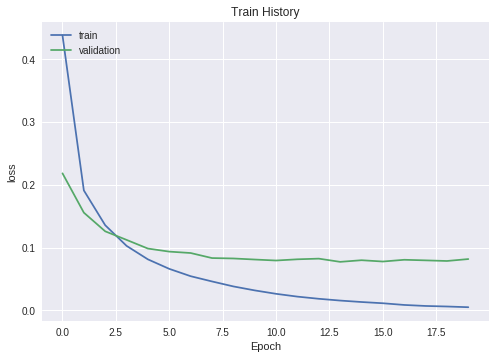

In [43]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [44]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 49us/step

accuracy= 0.978


# 進行預測

In [0]:
prediction=model.predict_classes(x_Test)

In [46]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

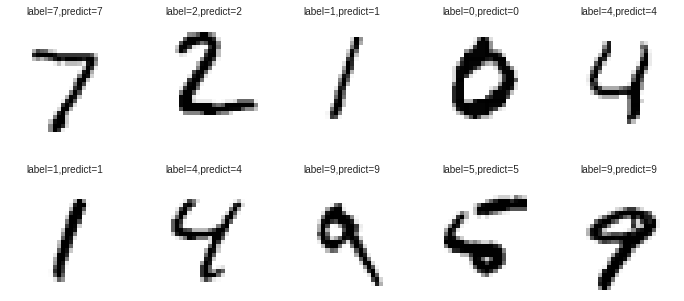

In [48]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [49]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,1,1,0,3,1,3,0
1,0,1125,4,0,0,1,2,1,2,0
2,5,1,1010,1,0,0,3,7,5,0
3,0,0,3,987,0,3,0,7,3,7
4,1,1,4,1,953,0,4,4,1,13
5,2,0,0,11,1,865,5,2,3,3
6,5,2,3,1,3,3,941,0,0,0
7,0,2,6,2,0,0,0,1016,1,1
8,5,1,6,6,3,3,3,9,935,3


In [50]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [51]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


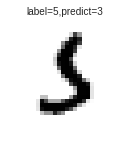

In [52]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

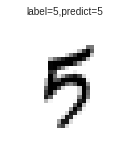

In [53]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

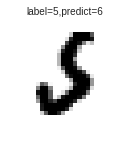

In [54]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=9982,num=1)

In [55]:
x_test_image[9982]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  53, 254, 254, 254, 254, 167,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  28, 213, 253, 253, 253, 253, 234,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 183, 253, 253, 236, 126,  26,  65,   0,   0,   0,   0,   0,
          0,   0],
       [  